In [3]:
!pip install gplearn

In [4]:
import numpy as np
from gplearn.genetic import SymbolicRegressor

In [5]:
X = np.linspace(-10, 10, 1000)
y = X**2 + 3*X

In [6]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=42)

est_gp.fit(np.c_[X], y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    48.21      3.57156e+07       31         0.590457         0.590457      1.79m
   1    26.49           111.72       13        0.0265267        0.0265267      1.21m
   2    23.41          139.619       17       0.00999078       0.00999078      1.02m


SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=42, stopping_criteria=0.01, verbose=1)

In [7]:
a = print(est_gp._program)

add(add(add(0.610, X0), sub(X0, -0.863)), add(-0.799, add(mul(X0, X0), add(X0, -0.684))))


In [ ]:
# add(add(add(0.610, X0), sub(X0, -0.863)), add(-0.799, add(mul(X0, X0), add(X0, -0.684))))
import sympy as smp
x = smp.symbols("x")

eq = ((0.610 + x) + (x + 0.863)) + ((x**2) + (x - 0.684) - 0.799)
eq.simplify()

x**2 + 3*x - 0.0100000000000002

# Example 2

In [31]:
X = np.linspace(1, 10, 1000)
y = np.sqrt(3*X) + np.log(X**2)

In [52]:
est_gp = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.01,
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient=0.01, random_state=42,
                           function_set = ("add", "sub", "mul", "div", "log", "sqrt"))

est_gp.fit(np.c_[X], y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    22.87          139.192       12         0.270852          0.25661      1.23m
   1    18.59          145.929       20          0.14601         0.169213      1.10m
   2    15.25          14.2691       23        0.0671153        0.0827209     58.66s
   3    13.99          22.9679       19        0.0595569        0.0690087     51.80s
   4    15.70          16.7575       34        0.0429347        0.0421898     56.44s
   5    15.21          18.7064       34        0.0429198        0.0423241      1.01m
   6    14.68          6.08119       27        0.0437731        0.0407995     55.88s
   7    14.68           4.8775       25        0.0428666        0.0512093     49.36s
   8    14.07          4.92367       16        0.0438208        0.0807682  

SymbolicRegressor(function_set=('add', 'sub', 'mul', 'div', 'log', 'sqrt'),
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=42, stopping_criteria=0.01, verbose=1)

In [53]:
a = print(est_gp._program)

sqrt(add(div(sub(0.605, X0), -0.093), log(sub(0.630, X0))))


In [50]:
# sqrt(add(div(sub(0.605, X0), -0.093), log(sub(0.630, X0))))

import sympy as smp
x = smp.symbols("x")

eq = smp.sqrt((0.605 - x)/(-0.093) + smp.log(x-0.630))
eq.simplify()

3.27912917891976*sqrt(x + 0.093*log(x - 0.63) - 0.605)

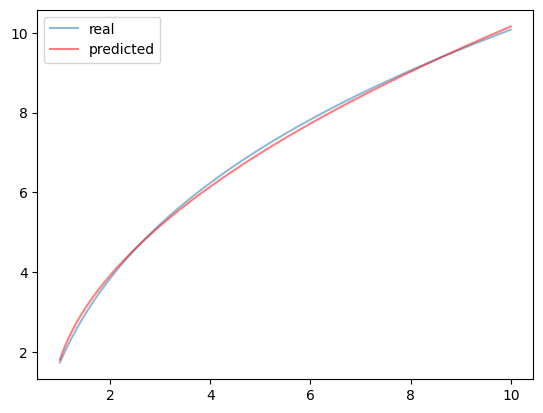

In [55]:
from sympy.utilities.lambdify import lambdify
from matplotlib import pyplot as plt

f = lambdify([x], eq)
y_new = f(X)

plt.plot(X, y, alpha=0.5, label="real")
plt.plot(X, y_new, c="red", alpha=0.5, label="predicted")
plt.legend()
plt.show()